In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 16})

Consider the motion of a ball falling under gravity. 

Newton's equation is $m\ddot y = -mg$

$y = -gt^2/2 + a (t-t_0)(t-s)$

We choose initial time $t_0=0$ and final time $s=1$. We also assume that the particle is at rest at $t=0$.

In [2]:
g = 1
s = 1 

def y(t,eps):
    return -0.5*g*t*t + eps*t*(t-1)

def action(t, a):
    a2 = a*a
    t3 = t*t*t
    t2 = t*t
    s2 = s*s
    return 0.5*a2*s2*t + t3*(2*a2/3 - a + 1/3) + t2*(-a2*s + a*s)

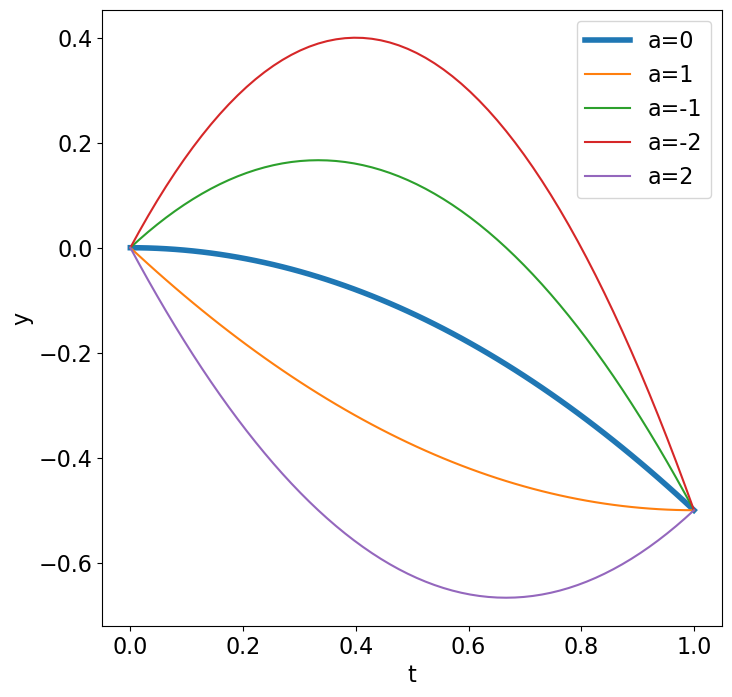

In [3]:
Nt = 64
t = np.linspace(0, s, Nt)
plt.figure(figsize=(8, 8), dpi=100)

plt.plot(t, y(t, 0), lw=4, label='a=0')
plt.plot(t, y(t, 1), label='a=1')
plt.plot(t, y(t, -1), label='a=-1')
plt.plot(t, y(t, -2), label='a=-2')
plt.plot(t, y(t, 2), label='a=2')

plt.xlabel('t')
plt.ylabel('y');
plt.legend()

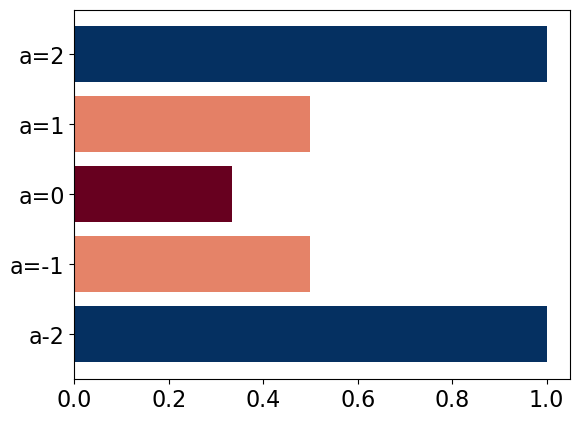

In [4]:
xBar = np.array(["a-2", "a=-1", "a=0", "a=1", "a=2"])
yBar = np.array([ action(s, -2),action(s, -1), action(s, 0), action(s, 1), action(s, 2) ])

rescale = lambda yBar: (yBar - np.min(yBar)) / (np.max(yBar) - np.min(yBar))
plt.barh(xBar, yBar, color=plt.get_cmap("RdBu")(rescale(yBar)));

In [5]:
from sympy import *

In [6]:
t = symbols('t')
a = symbols('a', real = True, constant = True)
s = symbols('s', real = True, constant = True)

init_printing(use_unicode=True)

In [7]:
y = -0.5*t*t + a*t*(t-s) 

ydot = diff(y, t)
ydot

In [8]:
lagrangian = 0.5*ydot*ydot - y

lagrangian

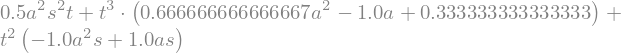

In [9]:
action = integrate(lagrangian, t)
action